In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
# read csv file
data = pd.read_csv("C:\\Users\\Hp\\Downloads\\survey_results_public.csv")

In [3]:
# print data
data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
# replace 'NaN' with nan
data = data.replace('NaN', np.nan)

In [5]:
# rows containing asp.net will be selected
desired_framework_aspdotnetcore = data['WebframeDesireNextYear'].str.contains('ASP.NET Core', na=False)

In [6]:
# years of coding of aspdotnet user
years_aspdotnetcore = data[desired_framework_aspdotnetcore]['YearsCode']

In [7]:
# rows containing react.js will be selected
desired_framework_reactjs = data['WebframeDesireNextYear'].str.contains('React.js', na=False)

In [8]:
# years of coding of react.js user
years_reactjs = data[desired_framework_reactjs]['YearsCode']

In [9]:
# rows containing angular will be selected
desired_framework_angularjs = data['WebframeDesireNextYear'].str.contains('Angular.js', na=False)

In [10]:
# years of coding of angular user
years_angularjs = data[desired_framework_angularjs]['YearsCode']

In [11]:
# drop na
years_aspdotnetcore = years_aspdotnetcore.dropna()
years_reactjs = years_reactjs.dropna()
years_angularjs = years_angularjs.dropna()

In [12]:
# replace less than 1 year with 0.5
years_aspdotnetcore = years_aspdotnetcore.replace('Less than 1 year', 0.5)
years_reactjs = years_reactjs.replace('Less than 1 year', 0.5)
years_angularjs = years_angularjs.replace('Less than 1 year', 0.5)

In [13]:
# replace more than 50 years with 55
years_aspdotnetcore = years_aspdotnetcore.replace('More than 50 years', 55)
years_reactjs = years_reactjs.replace('More than 50 years', 55)
years_angularjs = years_angularjs.replace('More than 50 years', 55)

In [14]:
# convert all strings to numeric value
years_aspdotnetcore = pd.to_numeric(years_aspdotnetcore)
years_reactjs = pd.to_numeric(years_reactjs)
years_angularjs = pd.to_numeric(years_angularjs)

In [15]:
# check condition if all rows of years are greater than 0
years_aspdotnetcore = years_aspdotnetcore[years_aspdotnetcore > 0]
years_reactjs = years_reactjs[years_reactjs > 0]
years_angularjs = years_angularjs[years_angularjs > 0]

In [16]:
# describe
years_aspdotnetcore.describe()
years_reactjs.describe()
years_angularjs.describe()

count    5220.000000
mean       10.380268
std         8.944531
min         0.500000
25%         4.000000
50%         8.000000
75%        13.000000
max        55.000000
Name: YearsCode, dtype: float64

In [17]:
# median
years_aspdotnetcore.median()
years_reactjs.median()
years_angularjs.median()

8.0

In [18]:
# mode
years_aspdotnetcore.mode()
years_reactjs.mode()
years_angularjs.mode()

0    5.0
dtype: float64

In [19]:
# statistic, p-value
result = stats.levene(years_aspdotnetcore, years_reactjs, years_angularjs)

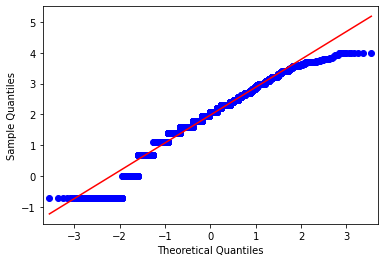

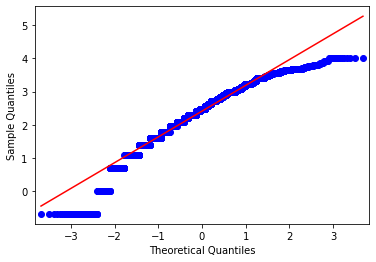

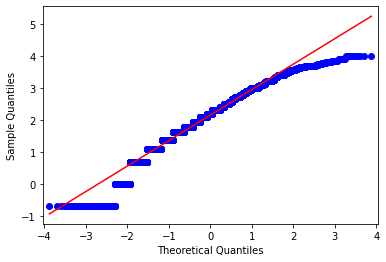

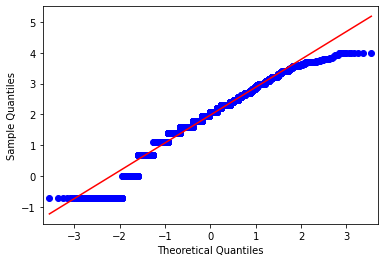

In [20]:
# qqplot
sm.qqplot(np.log(years_aspdotnetcore), line='r')
sm.qqplot(np.log(years_reactjs), line='r')
sm.qqplot(np.log(years_angularjs), line='r')

In [21]:
# One-Way Anova
F, p = stats.f_oneway(years_aspdotnetcore, years_reactjs, years_angularjs)
print('F-Statistic = %.3f, p = %.3f' % (F, p))

F-Statistic = 462.327, p = 0.000


In [22]:
# since p value is 0, so the null hypothesis is rejected!
# Variance is not same